# Summarizing Data: Student Data and World Development
Chien-Lan Hsueh

## Part 1 - Summarizing Student Data

In [1]:
# import modules used in this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

### Task 1:  Read in the data

In [2]:
# read in student math data
df_raw = pd.read_csv("student-mat.csv", sep = ";")

# get dataframe info
print(df_raw.info())

# take a look at the first 5 rows
df_raw.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Task 2: Summarize the data

#### Task 2.1: Categorical variables
We summarize the following three categorical variables by creating contigency tables (one-way, two-way and three-way) and bar plots.

From the description of the dataset:
- 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira): 2 levels
- 2 sex - student's sex (binary: "F" - female or "M" - male): 2 levels
- 12 guardian - student's guardian (nominal: "mother", "father" or "other"): 3 levels

We choose to use the variables #1 school, #2 sex and #12 guardian: 

In [3]:
# select the variables of interest by index #
vars_picked = [1, 2, 12]

Convert to categorical variables:

In [4]:
# make a copy of the raw dataframe
df = df_raw.copy()

# convert the chosen columns to categorical variables
for i in vars_picked:
    df.iloc[:, i-1] = df_raw.iloc[:, i-1].astype("category")
    print(df.iloc[:, i-1].head())
    print("\n")
    pass

0    GP
1    GP
2    GP
3    GP
4    GP
Name: school, dtype: category
Categories (2, object): ['GP', 'MS']


0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: category
Categories (2, object): ['F', 'M']


0    mother
1    father
2    mother
3    mother
4    father
Name: guardian, dtype: category
Categories (3, object): ['father', 'mother', 'other']




##### #1 One-way contingency tables
There are 3 one-way tables from the 3 categorical variables:

In [5]:
# create one-way contingency tables
for i in vars_picked:
    print(df.iloc[:, i-1].value_counts())
    print("\n")
    pass

GP    349
MS     46
Name: school, dtype: int64


F    208
M    187
Name: sex, dtype: int64


mother    273
father     90
other      32
Name: guardian, dtype: int64




**Interpretation of a one-way table**

Using the first table (school) as an example, 349 students enroll in Gabriel Pereira (GP) and 46 enroll in Mousinho da Silveira (MS).

##### #2 Two-way contingency tables
There are $C^{3}_{2}=3$ combinations of two-way tables from the 3 categorical variables:

In [6]:
# create two-way contingency tables
for i, j in list(combinations(vars_picked, 2)):
    print(pd.crosstab(df.iloc[:, i-1], df.iloc[:, j-1], margins = True))
    print("\n")
    pass

sex       F    M  All
school               
GP      183  166  349
MS       25   21   46
All     208  187  395


guardian  father  mother  other  All
school                              
GP            78     245     26  349
MS            12      28      6   46
All           90     273     32  395


guardian  father  mother  other  All
sex                                 
F             43     145     20  208
M             47     128     12  187
All           90     273     32  395




**Interpretation of a two-way table**

Using the first table (school*sex) as an example: 
- Among the 349 students in Gabriel Pereira (GP), there are 183 female and 166 male students. 
- Among the 46 students in Mousinho da Silveira (MS), there are 25 femal and 21 male students.

##### #3 Three-way contingency table
There are $C^{3}_{3}=1$ combination of three-way table from the 3 categorical variables:

In [7]:
# create a three-way contingency table
for i, j, k in list(combinations(vars_picked, 3)):
    print(pd.crosstab([df.iloc[:, i-1], df.iloc[:, j-1]], df.iloc[:, k-1], margins = True))
    print("\n")
    pass

guardian    father  mother  other  All
school sex                            
GP     F        37     128     18  183
       M        41     117      8  166
MS     F         6      17      2   25
       M         6      11      4   21
All             90     273     32  395




**Interpretation of the three-way table**

Using the  table (school *sex *guardian) as an example:
- there are 37 female studens in GP school have father as their guardians
- there are 41 male studens in GP school have father as their guardians
- there are 6 female studens in MS school have father as their guardians
- there are 6 male studens in MS school have father as their guardians.

- there are 128 female studens in GP school have mother as their guardians
- there are 117 male studens in GP school have mother as their guardians
- there are 17 female studens in MS school have mother as their guardians
- there are 11 male studens in MS school have mother as their guardians.

- there are 18 female studens in GP school don't have their parents as their guardians
- there are 8 male studens in GP school don't have their parents as their guardians
- there are 2 female studens in MS school don't have their parents as their guardians
- there are 4 male studens in MS school don't have their parents as their guardians.

##### #4 Conditional two-way contingency tables
Create a conditional two-way table $school*guardian$: female students

In [8]:
# Method 1: by subsetting the data and then creating the two-way table
print(pd.crosstab([df.school, df[df.sex=="F"].sex], df.guardian))
print("\n")

# Method 2: by creating a three-way table and subsetting it
print(pd.crosstab([df.school, df.sex], df.guardian).loc[(("GP", "MS"), "F"), :])
print("\n")

guardian    father  mother  other
school sex                       
GP     F        37     128     18
MS     F         6      17      2


guardian    father  mother  other
school sex                       
GP     F        37     128     18
MS     F         6      17      2




##### #5 Bar graphs
Create a stacked bar graph and a side-by-side bar graph:

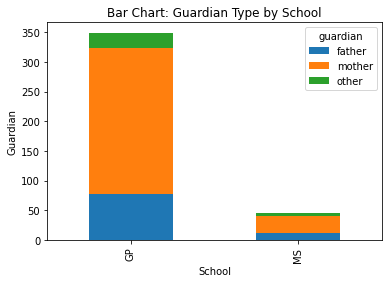

In [9]:
# stacked bar graph
pd.crosstab(df.school, df.guardian).plot.bar(stacked = True)

# assign title and axis labels
plt.title("Bar Chart: Guardian Type by School")
plt.xlabel("School")
plt.ylabel("Guardian")

plt.show()

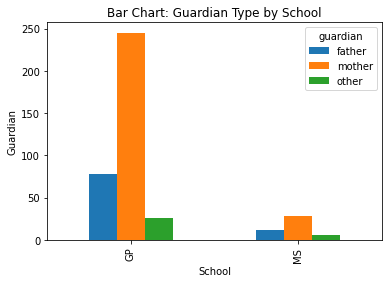

In [10]:
# side-by-side bar graph
pd.crosstab(df.school, df.guardian).plot.bar()

# assign title and axis labels
plt.title("Bar Chart: Guardian Type by School")
plt.xlabel("School")
plt.ylabel("Guardian")

plt.show()

#### Task 2.1: Numeric variables  (and across groups)
For the selected numerica variables (age, absence and grades), we summarize them with the measure of center and spread, and correation matrixes as well as some graphical summary plots including histograms,kernek desnity plot, boxplots and scattering plots.

##### #1 - #3 Measures of Center and Spread

In [11]:
# measures of center and spread for G1, G2 and G3 grades
df[["age", "absences", "G3"]].agg([np.mean, np.std])

,age,absences,G3
mean,16.696203,5.708861,10.415190
std,1.276043,8.003096,4.581443


In [12]:
# measures of center and spread for G1, G2 and G3 grades by school
df.groupby("school")[["age", "absences", "G3"]].agg([np.mean, np.std])

age            absences                   G3          
             mean       std      mean       std       mean       std
school                                                              
GP      16.521490  1.216610  5.965616  8.341764  10.489971  4.625397
MS      18.021739  0.881643  3.760870  4.274913   9.847826  4.237229

In [13]:
# measures of center and spread for G1, G2 and G3 grades by school and sex
df.groupby(["school", "sex"])[["age", "absences", "G3"]].agg([np.mean, np.std])

age            absences                   G3          
                 mean       std      mean       std       mean       std
school sex                                                              
GP     F    16.579235  1.173426  6.639344  9.852259   9.972678  4.604622
       M    16.457831  1.263005  5.222892  6.215695  11.060241  4.594725
MS     F    17.840000  0.746101  3.120000  4.702127   9.920000  4.846992
       M    18.238095  0.995227  4.523810  3.669047   9.761905  3.491486

##### #4 Correlation Matrix

In [14]:
df[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


##### Plots: for two of the numeric variables across one of the categorical variables

Histograms

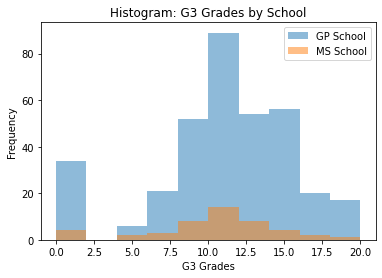

In [15]:
# histogram #1: G3 by school
df1 = df.loc[df.school == "GP", "G3"]
df2 = df.loc[df.school == "MS", "G3"]

# prep data for histogram
df_hist = pd.DataFrame([pd.Series(df1), pd.Series(df2)]).transpose()
df_hist.columns = ["GP School", "MS School"]

# plot histogram with title and axis label
df_hist.plot.hist(alpha = 0.5)
plt.title("Histogram: G3 Grades by School")
plt.xlabel("G3 Grades")

plt.show()

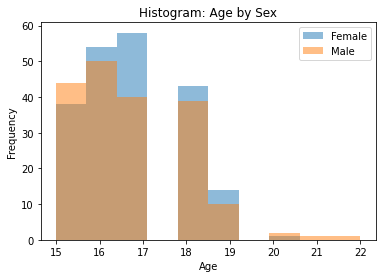

In [16]:
# histogram #2: age by sex
df1 = df.loc[df.sex == "F", "age"]
df2 = df.loc[df.sex == "M", "age"]

# prep data for histogram
df_hist = pd.DataFrame([pd.Series(df1), pd.Series(df2)]).transpose()
df_hist.columns = ["Female", "Male"]

# plot histogram with title and axis label
df_hist.plot.hist(alpha = 0.5)
plt.title("Histogram: Age by Sex")
plt.xlabel("Age")

plt.show()

Kernel density plots

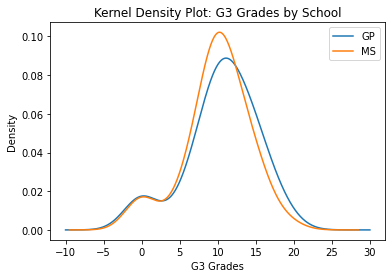

In [17]:
# kernel density plot #1: G3 by school
df.loc[df.school == "GP", "G3"].plot.density(bw_method = 0.5, label = "GP")
df.loc[df.school == "MS", "G3"].plot.density(bw_method = 0.5, label = "MS")

# assign title and axis labels
plt.title("Kernel Density Plot: G3 Grades by School")
plt.xlabel("G3 Grades")

# add legend
plt.legend()

plt.show()

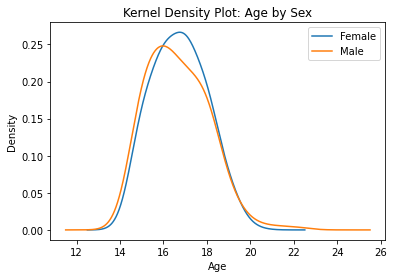

In [18]:
# kernel density plot #2: age by sex
df.loc[df.sex == "F", "age"].plot.density(bw_method = 0.5, label = "Female")
df.loc[df.sex == "M", "age"].plot.density(bw_method = 0.5, label = "Male")

# assign title and axis labels
plt.title("Kernel Density Plot: Age by Sex")
plt.xlabel("Age")

# add legend
plt.legend()

plt.show()

Boxplots

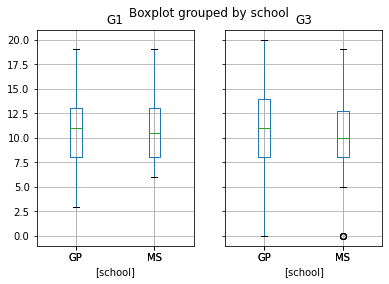

In [19]:
# boxplot #1: G1 and G3 by school
df.boxplot(column = ["G1", "G3"], by = ["school"])

plt.show()

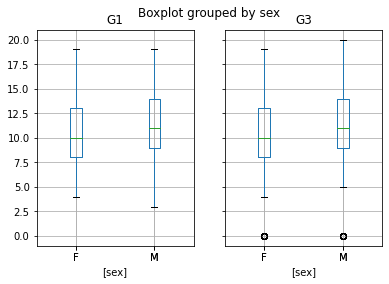

In [20]:
# boxplot #2: G1 and G3 by sex
df.boxplot(column = ["G1", "G3"], by = ["sex"])

plt.show()

Sctterplots

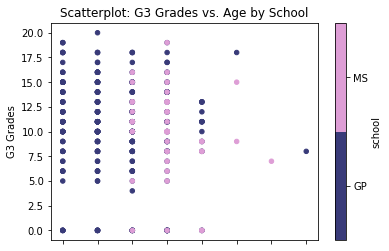

In [21]:
# scatterplot #1: G3 vs age by school
df.plot.scatter(x = "age", y = "G3", c = "school", cmap = "tab20b")

# assign title and axis labels
plt.title("Scatterplot: G3 Grades vs. Age by School")
plt.xlabel("Age")
plt.ylabel("G3 Grades")

plt.show()

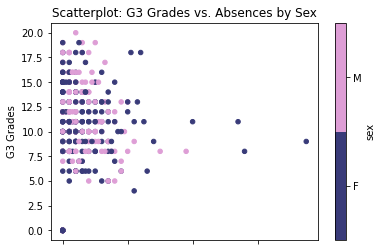

In [22]:
# scatterplot #1: G3 vs absences by sex
df.plot.scatter(x = "absences", y = "G3", c = "sex", cmap = "tab20b")

# assign title and axis labels
plt.title("Scatterplot: G3 Grades vs. Absences by Sex")
plt.xlabel("Absences")
plt.ylabel("G3 Grades")

plt.show()

## Part 2 - Summarizing World Development


In [23]:
# read in data
df_wd = pd.read_excel("WorldDevelopmentIndicators.xlsx", sheet_name = "Data")

In [24]:
# get dataframe info
print(df_wd.info())

# take a look at the first 5 rows
df_wd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Country Name    1048575 non-null  object 
 1   Country Code    1048575 non-null  object 
 2   Indicator Name  1048575 non-null  object 
 3   Indicator Code  1048575 non-null  object 
 4   Year            1048575 non-null  int64  
 5   Value           1048575 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 48.0+ MB
None


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2000,73.702495
1,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2001,74.944860
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2002,76.258066
3,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2003,77.120464
4,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,2004,78.094440


### Task 2: Summarize the data
Use line charts to show how some economic and education measures have changed over time in different countries.

#### #1: How the access to clean fuels and technologies for cooking has changed over time in Arab world (ARB)?

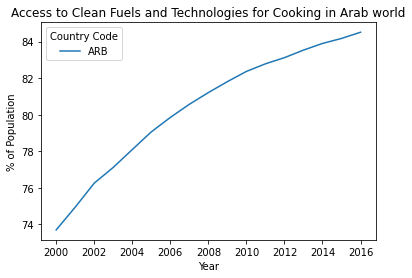

In [25]:
# select country of interest
lst_country = ["ARB"]

# select indicator of interest
lst_indicator = ["EG.CFT.ACCS.ZS"]

# subset the data set for plot
df_p1 = df_wd[(df_wd["Country Code"].isin(lst_country)) & (df_wd["Indicator Code"].isin(lst_indicator))]

# convert to wide form
df_p1 = df_p1.pivot(index="Year", columns="Country Code", values="Value")

df_p1.plot.line()

# assign title and axis labels
plt.title("Access to Clean Fuels and Technologies for Cooking in Arab world")
plt.xlabel("Year")
plt.ylabel("% of Population")

plt.show()

#### #2: How the access to electricity has changed over time in the following regions?

- Arab World (ARB)
- Caribbean small states (CEB)
- Central Europe and the Baltics (CSS)
- Early-demographic dividend (EAP)
- East Asia & Pacific (excluding high income) (EAR)

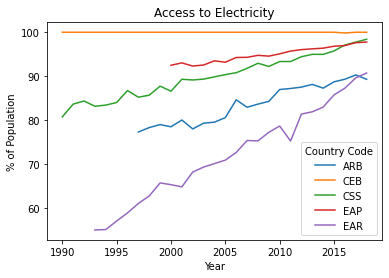

In [26]:
# select country of interest
lst_country = ['ARB', 'CEB', 'CSS', 'EAP', 'EAR']

# select indicator of interest
lst_indicator = ["EG.ELC.ACCS.ZS"]

# subset the data set for plot
df_p2 = df_wd[(df_wd["Country Code"].isin(lst_country)) & (df_wd["Indicator Code"].isin(lst_indicator))]

# convert to wide form
df_p2 = df_p2.pivot(index="Year", columns="Country Code", values="Value")

df_p2.plot.line()

# assign title and axis labels
plt.title("Access to Electricity")
plt.xlabel("Year")
plt.ylabel("% of Population")

plt.show()

#### #3: How the access to electricity has changed over time in rual and uraban areas in Arab world?

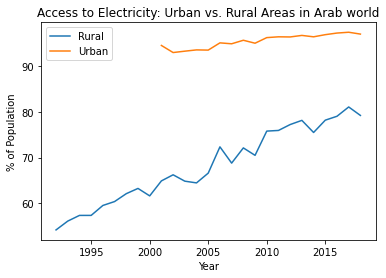

In [27]:
# select country of interest
lst_country = ["ARB"]

# select indicator of interest
lst_indicator = ["EG.ELC.ACCS.RU.ZS","EG.ELC.ACCS.UR.ZS"]

# subset the data set for plot
df_p3 = df_wd[(df_wd["Country Code"].isin(lst_country)) & (df_wd["Indicator Code"].isin(lst_indicator))]

# convert to wide form and change the column names
df_p3 = df_p3.pivot(index="Year", columns="Indicator Code", values="Value")
df_p3.columns = ["Rural", "Urban"]

df_p3.plot.line()

# assign title and axis labels
plt.title("Access to Electricity: Urban vs. Rural Areas in Arab world")
plt.xlabel("Year")
plt.ylabel("% of Population")

plt.show()